<img src='https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/sparkSQL4.png' width="80%" height="80%"></img>

<img src='https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/sparkSQL2.png' width="80%" height="80%"></img>

<img src='https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/sparkSQL3.png' width="80%" height="80%"></img>

<img src='https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/sparkSQL1.png' width="80%" height="80%"></img>

# SQL queries Dataframes, not RDDs

A data file on world banks will downloaded from GitHub after removing any previous data that may exist

In [1]:
# In jupyter notebooks you can prefice commands with a ! to run shell commands
# here we remove any files with the name of the file we are going to download
# then download the file

!rm world_bank.json.gz -f
!wget https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz

--2017-06-28 20:59:39--  https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446287 (436K) [application/octet-stream]
Saving to: ‘world_bank.json.gz’

100%[======================================>] 446,287     --.-K/s   in 0.03s   

2017-06-28 20:59:40 (14.8 MB/s) - ‘world_bank.json.gz’ saved [446287/446287]



In [2]:
spark

In [3]:
df = spark.read.json('world_bank.json.gz')

In [4]:
df.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- $oid: string (nullable = true)
 |-- approvalfy: string (nullable = true)
 |-- board_approval_month: string (nullable = true)
 |-- boardapprovaldate: string (nullable = true)
 |-- borrower: string (nullable = true)
 |-- closingdate: string (nullable = true)
 |-- country_namecode: string (nullable = true)
 |-- countrycode: string (nullable = true)
 |-- countryname: string (nullable = true)
 |-- countryshortname: string (nullable = true)
 |-- docty: string (nullable = true)
 |-- envassesmentcategorycode: string (nullable = true)
 |-- grantamt: long (nullable = true)
 |-- ibrdcommamt: long (nullable = true)
 |-- id: string (nullable = true)
 |-- idacommamt: long (nullable = true)
 |-- impagency: string (nullable = true)
 |-- lendinginstr: string (nullable = true)
 |-- lendinginstrtype: string (nullable = true)
 |-- lendprojectcost: long (nullable = true)
 |-- majorsector_percent: array (nullable = true)
 |    |-- element: struct (containsNu

In [5]:
from pyspark.sql.types import IntegerType, StringType

df = df.withColumn('approvalfy',df['approvalfy'].cast(IntegerType()))

In [6]:
df.describe().toPandas()

,summary,approvalfy,grantamt,ibrdcommamt,idacommamt,lendprojectcost,totalamt,totalcommamt
0,count,500,500,500,500,500,500,500
1,mean,2013.108,4432400.0,3.28601E7,3.542136E7,1.5472408E8,6.828146E7,7.271386E7
2,stddev,0.7220656185659391,2.023307257664499E7,1.0891968009875733E8,7.681430978486918E7,4.764210880341054E8,1.2426624790346088E8,1.2347049476800898E8
3,min,1999,0,0,0,30000,0,30000
4,max,2015,365000000,1307800000,600000000,5170000000,1307800000,1307800000


In [7]:
df.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- $oid: string (nullable = true)
 |-- approvalfy: integer (nullable = true)
 |-- board_approval_month: string (nullable = true)
 |-- boardapprovaldate: string (nullable = true)
 |-- borrower: string (nullable = true)
 |-- closingdate: string (nullable = true)
 |-- country_namecode: string (nullable = true)
 |-- countrycode: string (nullable = true)
 |-- countryname: string (nullable = true)
 |-- countryshortname: string (nullable = true)
 |-- docty: string (nullable = true)
 |-- envassesmentcategorycode: string (nullable = true)
 |-- grantamt: long (nullable = true)
 |-- ibrdcommamt: long (nullable = true)
 |-- id: string (nullable = true)
 |-- idacommamt: long (nullable = true)
 |-- impagency: string (nullable = true)
 |-- lendinginstr: string (nullable = true)
 |-- lendinginstrtype: string (nullable = true)
 |-- lendprojectcost: long (nullable = true)
 |-- majorsector_percent: array (nullable = true)
 |    |-- element: struct (containsN

# Many other types are supported including text and Parquet

Here we are creating a Dataframe, similar to an RDD, but with a schema and abstraction that allows
for SQL to be used.

In [8]:
#You can load json, text and other files using sqlContext
#unlinke an RDD, this will attempt to create a schema around the data
#self describing data works really well for this

example1_df = spark.read.json("./world_bank.json.gz")

In [9]:
# Spark SQL has the ability to infer the schema of JSON data and understand the structure of the data
#once we have created the Dataframe, we can print out the schema to see the shape of the data

print example1_df.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- $oid: string (nullable = true)
 |-- approvalfy: string (nullable = true)
 |-- board_approval_month: string (nullable = true)
 |-- boardapprovaldate: string (nullable = true)
 |-- borrower: string (nullable = true)
 |-- closingdate: string (nullable = true)
 |-- country_namecode: string (nullable = true)
 |-- countrycode: string (nullable = true)
 |-- countryname: string (nullable = true)
 |-- countryshortname: string (nullable = true)
 |-- docty: string (nullable = true)
 |-- envassesmentcategorycode: string (nullable = true)
 |-- grantamt: long (nullable = true)
 |-- ibrdcommamt: long (nullable = true)
 |-- id: string (nullable = true)
 |-- idacommamt: long (nullable = true)
 |-- impagency: string (nullable = true)
 |-- lendinginstr: string (nullable = true)
 |-- lendinginstrtype: string (nullable = true)
 |-- lendprojectcost: long (nullable = true)
 |-- majorsector_percent: array (nullable = true)
 |    |-- element: struct (containsNu

# Let's take a look at the first two rows of data

The example below enumerates our "take" command that pulls 2 items from the Dataframe
<br>a simpiler option to see the data could also be:<br>

##### copy and run the following code
    for row in example1_df.take(2):
        print row
        print "*" * 20

In [10]:
for row in example1_df.take(2):
    print row
    print "*" * 20

Row(_id=Row($oid=u'52b213b38594d8a2be17c780'), approvalfy=u'1999', board_approval_month=u'November', boardapprovaldate=u'2013-11-12T00:00:00Z', borrower=u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA', closingdate=u'2018-07-07T00:00:00Z', country_namecode=u'Federal Democratic Republic of Ethiopia!$!ET', countrycode=u'ET', countryname=u'Federal Democratic Republic of Ethiopia', countryshortname=u'Ethiopia', docty=u'Project Information Document,Indigenous Peoples Plan,Project Information Document', envassesmentcategorycode=u'C', grantamt=0, ibrdcommamt=0, id=u'P129828', idacommamt=130000000, impagency=u'MINISTRY OF EDUCATION', lendinginstr=u'Investment Project Financing', lendinginstrtype=u'IN', lendprojectcost=550000000, majorsector_percent=[Row(Name=u'Education', Percent=46), Row(Name=u'Education', Percent=26), Row(Name=u'Public Administration, Law, and Justice', Percent=16), Row(Name=u'Education', Percent=12)], mjsector_namecode=[Row(code=u'EX', name=u'Education'), Row(code=u'EX', name=u'E

# Now let's register a table which is a pointer to the Dataframe and allows data access via Spark SQL

##### copy and run the following code
    #Simply use the Dataframe Object to create the table:
    example1_df.registerTempTable("world_bank")

In [11]:
 example1_df.registerTempTable("world_bank")

### The returned object will be a dataframe
##### copy and run the following code
    temp_df =  spark.sql("select * from world_bank limit 2")

    print type(temp_df)
    print "*" * 20
    print temp_df

In [12]:
temp_df =  spark.sql("select * from world_bank limit 2")

print type(temp_df)
print "*" * 20
print temp_df

<class 'pyspark.sql.dataframe.DataFrame'>
********************
DataFrame[_id: struct<$oid:string>, approvalfy: string, board_approval_month: string, boardapprovaldate: string, borrower: string, closingdate: string, country_namecode: string, countrycode: string, countryname: string, countryshortname: string, docty: string, envassesmentcategorycode: string, grantamt: bigint, ibrdcommamt: bigint, id: string, idacommamt: bigint, impagency: string, lendinginstr: string, lendinginstrtype: string, lendprojectcost: bigint, majorsector_percent: array<struct<Name:string,Percent:bigint>>, mjsector_namecode: array<struct<code:string,name:string>>, mjtheme: array<string>, mjtheme_namecode: array<struct<code:string,name:string>>, mjthemecode: string, prodline: string, prodlinetext: string, productlinetype: string, project_abstract: struct<cdata:string>, project_name: string, projectdocs: array<struct<DocDate:string,DocType:string,DocTypeDesc:string,DocURL:string,EntityID:string>>, projectfinancialty

#### One nice feature of the notebooks and python is that we can show it in a table via Pandas
sqlContext.sql("select id, borrower from world_bank limit 2").toPandas()

In [13]:
spark.sql("select id, borrower from world_bank limit 2").toPandas()

,id,borrower
0,P129828,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA
1,P144674,GOVERNMENT OF TUNISIA


### Here is a simple group by example:

#### Count the number of projects by each country, only list the top 10


In [14]:
query = """
select countryname,
       count(1) as projects
from world_bank
group by countryname
order by projects desc
limit 10
"""
spark.sql(query).toPandas()

,countryname,projects
0,Republic of Indonesia,19
1,People's Republic of China,19
2,Socialist Republic of Vietnam,17
3,Republic of India,16
4,Republic of Yemen,13
5,Kingdom of Morocco,12
6,People's Republic of Bangladesh,12
7,Nepal,12
8,Africa,11
9,Republic of Mozambique,11


### Simple Example of Adding a Schema (headers) to an RDD and using it as a dataframe

### In the example below a simple RDD is created with Random Data in two columns and an ID column.

#### copy and run the following code

    import random

    #first let's create a simple RDD

    #create a Python list of lists for our example
    data_e2 = []
    for x in range(1,6):
        random_int = int(random.random() * 10)
        data_e2.append([x, random_int, random_int^2])

    #create the RDD with the random list of lists
    rdd_example2 = sc.parallelize(data_e2)
    print rdd_example2.collect()


In [15]:
import random

#first let's create a simple RDD

#create a Python list of lists for our example
data_e2 = []
for x in range(1,6):
    random_int = int(random.random() * 10)
    data_e2.append([x, random_int, random_int^2])

#create the RDD with the random list of lists
rdd_example2 = sc.parallelize(data_e2)
print rdd_example2.collect()

[[1, 8, 10], [2, 8, 10], [3, 6, 4], [4, 5, 7], [5, 3, 1]]


#### Now we can assign some header information

#### copy and run the following code
    from pyspark.sql.types import *

    # The schema is encoded in a string.
    schemaString = "ID VAL1 VAL2"

    fields = [StructField(field_name, StringType(), True) for field_name in schemaString.split()]
    schema = StructType(fields)

    # Apply the schema to the RDD.
    schemaExample = sqlContext.createDataFrame(rdd_example2, schema)

    # Register the DataFrame as a table.
    schemaExample.registerTempTable("example2")

    # Pull the data
    print schemaExample.collect()



In [16]:
from pyspark.sql.types import *

# The schema is encoded in a string.
schemaString = "ID VAL1 VAL2"

fields = [StructField(field_name, StringType(), True) for field_name in schemaString.split()]
schema = StructType(fields)

# Apply the schema to the RDD.
schemaExample = sqlContext.createDataFrame(rdd_example2, schema)

# Register the DataFrame as a table.
schemaExample.registerTempTable("example2")

# Pull the data
print schemaExample.collect()

[Row(ID=u'1', VAL1=u'8', VAL2=u'10'), Row(ID=u'2', VAL1=u'8', VAL2=u'10'), Row(ID=u'3', VAL1=u'6', VAL2=u'4'), Row(ID=u'4', VAL1=u'5', VAL2=u'7'), Row(ID=u'5', VAL1=u'3', VAL2=u'1')]


### Print only first 2 rows of the rdd

<br/>
<div>
<div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-11" href="#collapse1-11">
        Hint</a>
      </h4>
    </div>
    <div id="collapse1-11" class="panel-collapse collapse">
      <div class="panel-body">Use .take(N) </div>
    </div>
  </div>
 </div>

#### Now we can convert rdd_example3 to a Dataframe

##### copy and run this code
    from pyspark.sql import Row

    rdd_example3 = rdd_example2.map(lambda x: Row(id=x[0], val1=x[1], val2=x[2]))
    print rdd_example3.collect()
    df_example3 = rdd_example3.toDF()

In [17]:
from pyspark.sql import Row

rdd_example3 = rdd_example2.map(lambda x: Row(id=x[0], val1=x[1], val2=x[2]))
print rdd_example3.collect()
df_example3 = rdd_example3.toDF()

[Row(id=1, val1=8, val2=10), Row(id=2, val1=8, val2=10), Row(id=3, val1=6, val2=4), Row(id=4, val1=5, val2=7), Row(id=5, val1=3, val2=1)]


### Register this new data frame as a table 
register as temp table, call it 'df_example3'

In [18]:
df_example3.registerTempTable('df_example3')

# Another powerful feature is the ability to create Functions and Use them in SQL Here is a simple example

First we create a function in Python, then register it allowing for us to call it via SQL

#### copy and run the following code
    def simple_function(v):
        return int(v * 10)

    #test the function
    print simple_function(3)

In [19]:
def simple_function(v):
    return int(v * 10)

#test the function
print simple_function(3)

30


#### Now we can register the function for use in SQL
spark.udf.register('simple_function',simple_function,pyspark.sql.types.IntegerType())


In [20]:
spark.udf.register('simple_function',simple_function,pyspark.sql.types.IntegerType())

#### VAL1 and VAL2 look like strings, we can cast them as well

    query = """
    select
        ID,
        VAL1,
        VAL2,
        simple_function(cast(VAL1 as int)) as s_VAL1,
        simple_function(cast(VAL2 as int)) as s_VAL2
    from
     example2
    """
    spark.sql(query).toPandas()

In [33]:
query = """
select
    ID,
    VAL1,
    VAL2,
    simple_function(cast(VAL1 as int)) as s_VAL1,
    simple_function(cast(VAL2 as int)) as s_VAL2
from
 example2
"""
spark.sql(query).toPandas()

,ID,VAL1,VAL2,s_VAL1,s_VAL2
0,1,8,10,80,100
1,2,8,10,80,100
2,3,6,4,60,40
3,4,5,7,50,70
4,5,3,1,30,10


# Pandas Example
Pandas is a common abstraction for working with data in Python.

We can turn Pandas Dataframes into Spark Dataframes, the advantage of this 
could be scale or allowing us to run SQL statements agains the data.

### copy and run the following code
    import pandas as pd
    print pd

In [22]:
import pandas as pd
print pd

<module 'pandas' from '/gpfs/fs01/user/s280-a46e86a84e2274-95b1885704d4/.local/lib/python2.7/site-packages/pandas/__init__.pyc'>


### First, let's grab some UFO data to play with

    !rm SIGHTINGS.csv -f
    !wget https://www.quandl.com/api/v3/datasets/NUFORC/SIGHTINGS.csv

In [23]:
!rm SIGHTINGS.csv -f
!wget https://www.quandl.com/api/v3/datasets/NUFORC/SIGHTINGS.csv

--2017-06-28 21:03:09--  https://www.quandl.com/api/v3/datasets/NUFORC/SIGHTINGS.csv
Resolving www.quandl.com (www.quandl.com)... 104.25.53.103, 104.25.54.103, 2400:cb00:2048:1::6819:3667, ...
Connecting to www.quandl.com (www.quandl.com)|104.25.53.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14440 (14K) [text/csv]
Saving to: ‘SIGHTINGS.csv’

100%[======================================>] 14,440      --.-K/s   in 0.001s  

2017-06-28 21:03:09 (12.1 MB/s) - ‘SIGHTINGS.csv’ saved [14440/14440]



### Using the CSV file, we can create a Pandas Dataframe:
    pandas_df = pd.read_csv("./SIGHTINGS.csv")
    pandas_df.head()

In [24]:
pandas_df = pd.read_csv("./SIGHTINGS.csv") 
pandas_df.head()

,Reports,Count
0,2017-06-30,235.0
1,2017-05-31,342.0
2,2017-04-30,396.0
3,2017-03-31,335.0
4,2017-02-28,412.0


### Look at the dataset, by registering as a temp table

In [25]:
ufo_data = spark.createDataFrame(pandas_df)
ufo_data.registerTempTable('ufo_data')

# Visualizing the Data
- Here are some simple ways to create charts using Pandas output
- In order to display in the notebook we need to tell matplotlib to render inline
at this point import the supporting libraries as well


In [26]:
%matplotlib inline 
import matplotlib.pyplot as plt, numpy as np

Pandas can call a function "plot" to create the charts.
Since most charts are created from aggregates the record
set should be small enough to store in Pandas

We can take our UFO data from before and create a 
Pandas Dataframe from the Spark Dataframe

    ufos_df = ufo_data.toPandas()

In [27]:
ufos_df = ufo_data.toPandas()

To plot we call the "plot" method and specify the type, x and y axis columns
and optionally the size of the chart.

Many more details can be found here:
http://pandas.pydata.org/pandas-docs/stable/visualization.html
    
    
#### copy and run this code
ufos_df.plot(kind='bar', x='Reports', y='Count', figsize=(12, 5))

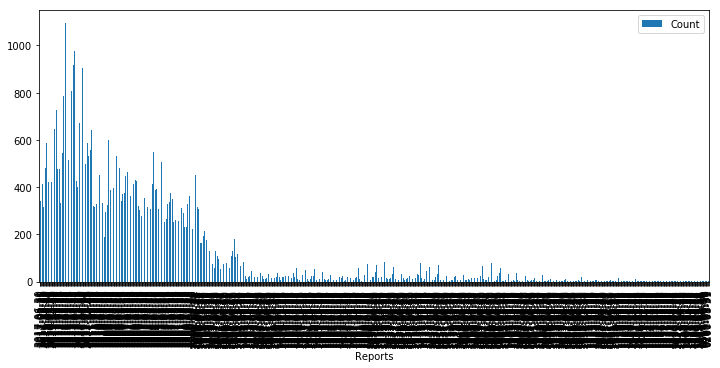

In [28]:
ufos_df.plot(kind='bar', x='Reports', y='Count', figsize=(12, 5))

### This doesn't look good, there are too many observations, can you check how many?


In [29]:
spark.sql("select count(*) from ufo_data").toPandas()

,count(1)
0,907


<h2>Ideally we could just group by year, there are many ways we could solve that:</h2>

1) parse the Reports column in SQL and output the year, then group on it
2) create a simple Python function to parse the year and call it via sql
3) as shown below: use map against the Dataframe and append a new column with "year"

Tge example below takes the existing data for each row and appends a new column "year" 
by taking the first for characters from the Reports column

Reports looks like this for example:
2016-01-31

##### copy and run this code
ufos_df = ufo_data.rdd.map(lambda x: Row(**dict(x.asDict(), year=int(x.Reports[0:4])))).toDF()

In [30]:
ufos_df = ufo_data.rdd.map(lambda x: Row(**dict(x.asDict(), year=int(x.Reports[0:4])))).toDF()

#### Register the new Dataframe as a table "ufo_withyear"

In [31]:
ufos_df.registerTempTable('ufo_withyear')

#### Now can you group by year, order by year and filter to the last 66 years?
plot your results

<div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-11" href="#collapse3-11">
        Answer</a>
      </h4>
    </div>
    <div id="collapse3-11" class="panel-collapse collapse">
      <div class="panel-body">query = """<br>
            select <br>
                sum(Count) as count, <br>
                year <br>
            from ufo_withyear<br>
            where year > 1950<br>
            group by year<br>
            order by year<br>
            """<br>
            pandas_ufos_withyears = sqlContext.sql(query).toPandas()<br>
            pandas_ufos_withyears.plot(kind='bar', x='year', y='count', figsize=(12, 5))<br></div>
    </div>
  </div>

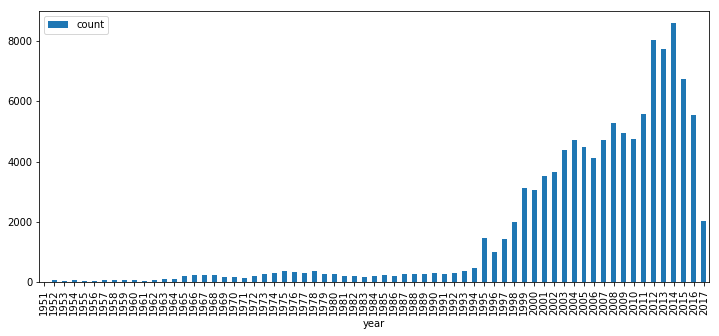

In [32]:
query = """
select 
    sum(Count) as count, 
    year 
from ufo_withyear
where year > 1950
group by year
order by year
"""
pandas_ufos_withyears = sqlContext.sql(query).toPandas()
pandas_ufos_withyears.plot(kind='bar', x='year', y='count', figsize=(12, 5))